In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

### The Central Limit Theorem 

/Users/marcomarino/Documents/GitHub/ml-basics/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


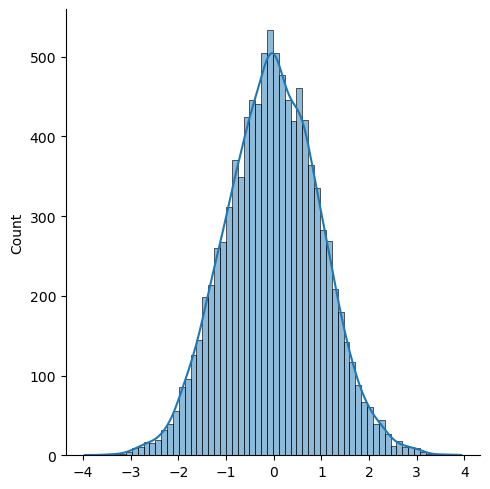

In [46]:
# to understand the CLT, let's sample some values from our 
# normal distribution...
# it generates an array with `size` number of values taken 
# from the normal distribution
x = np.random.normal(size=10 * 1000)
_ = sns.displot(x, kde=True)

In [47]:
# function that takes multiple random samples from a given distribution
# and calculates the mean of each sample, and returns the array 
# containing all the means calculated
def compute_sample_mean(input_distrib, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(
            input_distrib,
            size=sample_size,
            replace=False
        )
        sample_means.append(sample.mean())
    return sample_means

I am gonna call the generated array with the sample means **sampling distribution of the means**. Let's plot a couple of examples of different samplings. Let's start for instance by a sampling distribution fo 10 means, where each mean is taken from a distribution of 20 elements taken from samples we have generated from the gaussian distribution.

Let's observe now that the more samples we take, the more likely that the sampling distribution of the means will be *normally distributed*.

The core of the **Central Limit Theorem** is: as `n_samples` gets larger and larger, the sample means follow a normal distribution; the larger the sample is, tighter becomes the curve as the *standard deviation* becomes smaller ==> the sample mean must be closer to the population mean (*mu*).

/Users/marcomarino/Documents/GitHub/ml-basics/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marcomarino/Documents/GitHub/ml-basics/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marcomarino/Documents/GitHub/ml-basics/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marcomarino/Documents/GitHub/ml-basics/.conda/lib/python3.11/site-packages/sea

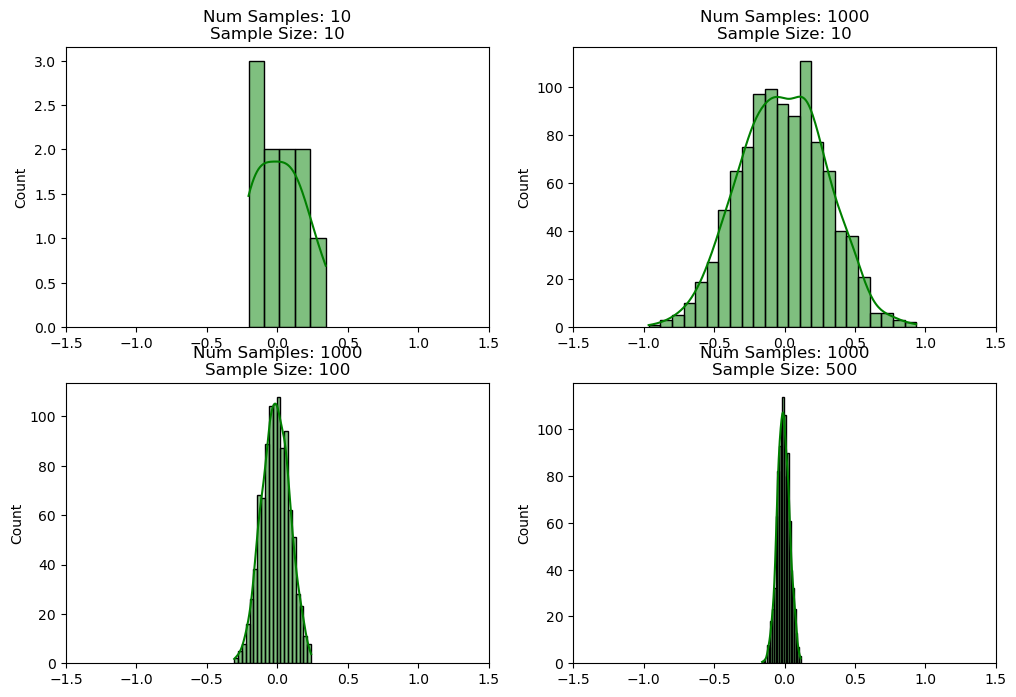

In [51]:
num_samples_arr = [10, 1000, 1000, 1000]
sample_size_arr = [10, 10, 100, 500]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, num_samples in enumerate(num_samples_arr):
    row = i // 2
    col = i % 2
    sns.histplot(compute_sample_mean(x, sample_size_arr[i], num_samples),
                color='green', ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'Num Samples: {num_samples}\nSample Size: {sample_size_arr[i]}')
    axes[row, col].set_xlim(-1.5, 1.5)

The effect is more visible when we sample from a skewed distribution

/Users/marcomarino/Documents/GitHub/ml-basics/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marcomarino/Documents/GitHub/ml-basics/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marcomarino/Documents/GitHub/ml-basics/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


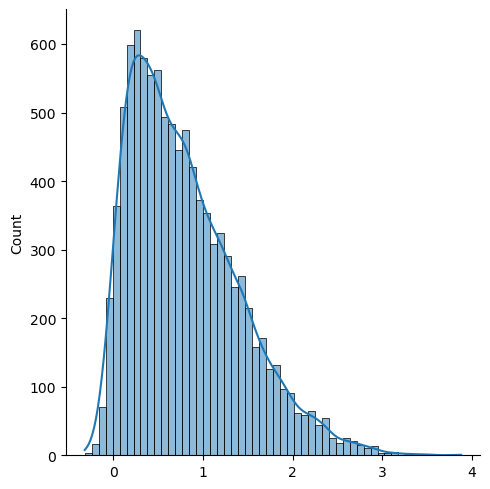

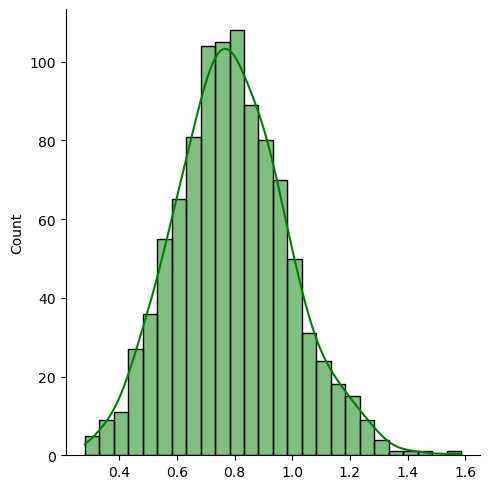

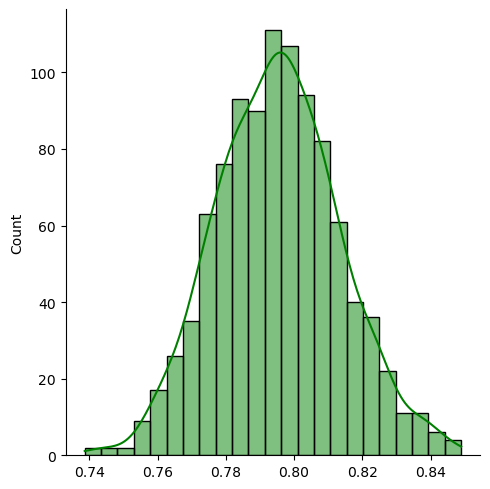

In [63]:
# it generates random samples from a skew-normal distribution
# 'rvs' stands for "random variates"
# 10 is the shape and 10000 is the number of random samples to generate
skewed_distrib = st.skewnorm.rvs(10, size=10000)
_ = sns.displot(skewed_distrib, kde=True)

_ = sns.displot(compute_sample_mean(skewed_distrib, 10, 1000),
                color='green', kde=True)

_ = sns.displot(compute_sample_mean(skewed_distrib, 1000, 1000),
                color='green', kde=True)


... or with a multimodal distribution

/Users/marcomarino/Documents/GitHub/ml-basics/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


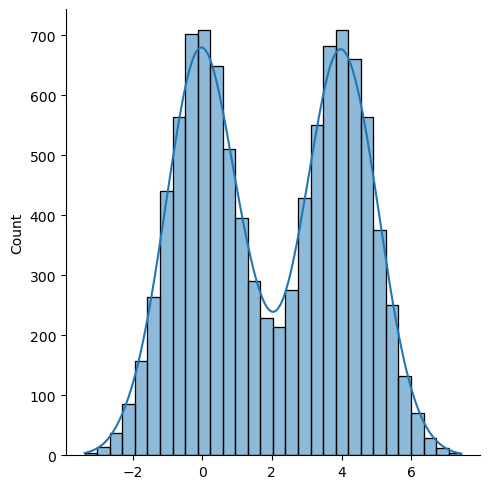

In [65]:
multimodal_distrib = np.concatenate((
    np.random.normal(size=5000),
    np.random.normal(loc=4, size=5000)
))
_ = sns.displot(multimodal_distrib, kde=True)

/Users/marcomarino/Documents/GitHub/ml-basics/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


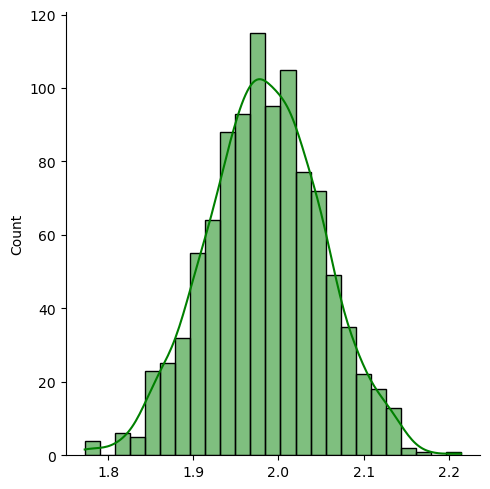

In [66]:
_ = sns.displot(compute_sample_mean(multimodal_distrib, 1000, 1000),
                color='green', kde=True)

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, enabling us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

For instance, the **t-test** allows us to infer whether two samples come from different populations, and thanks to CLT, we can use this test even if we don't have any clue what the underlying distributions of the populations being tested are, which may be the case more frequently than not.

(Finally, you may wonder what the purpose of sampling means is! Well, when we gather data from the real world we are nearly always sampling a subset of all the available data produced by a given random process. And, once we've collected a sample of data, the aspect of it we're often most interested in above all else is its mean.)